#### Please see the NB1 notebook first and then go see here the other options.

In [39]:
%load_ext autoreload
%autoreload 2
import vcf
import population
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pop = population.Population()

In [3]:
len(pop)

0

In [4]:
pop.extract_unlabeled()

## load not in parallel

this can be helpfull to look at a handfull values, you can add more later with `add_prev` 

In [25]:
pop.load_from_vcf(filename='data/out.recode.vcf', printinfo=True, maxval=3000, keep_prev=False)

having 84 chromosomes
meta :
OrderedDict([('fileformat', 'VCFv4.2'), ('hailversion', ['devel-76c42fe'])])
genomesize : 
3101804739
 999 doing chrom : 1, at pos : 207868132
PHASE nonzero 49980
SNPs nonzero 710566
you have 210 non finish european in your labeled set
you have 0 unknown in your labeled set
you have 228 south asian in your labeled set
you have 253 east asian in your labeled set
you have 155 mixed american in your labeled set
you have 58 finish in your labeled set
you have 382 african in your labeled set


In [26]:
pop.load_from_vcf(filename='data/out.recode.vcf', printinfo=True, maxval=2000, keep_prev=True)

having 84 chromosomes
meta :
OrderedDict([('fileformat', 'VCFv4.2'), ('hailversion', ['devel-76c42fe'])])
genomesize : 
3101804739
 999 doing chrom : 2, at pos : 167322522
PHASE nonzero 68700
SNPs nonzero 1137441
you have 210 non finish european in your labeled set
you have 0 unknown in your labeled set
you have 228 south asian in your labeled set
you have 253 east asian in your labeled set
you have 155 mixed american in your labeled set
you have 58 finish in your labeled set
you have 382 african in your labeled set


In [21]:
pop.train_gt.shape

(1286, 26933)

In [19]:
pop.test_gt = pop.test_gt.T
pop.train_gt = pop.train_gt[:-1].T

_yes you can even quit if you are bored and add those two lines to continue working on your project_

## the data..

Now let's have a look at the data and how we could really set out to find a nice classifier and dimensionality reductio algorithm `reducer`.

`compute_feature_nb` can be usefull to quickly find number of future doing grid search

In [73]:
pop.reduce_features(n_components=100,val='gt',reducer='lda')

In [74]:
pop.train_classifier(classifier='svm')

cv scores : [0.92111369 0.93457944 0.96252927]
the total score is of 0.9394074674507159


0.9394074674507159

__This was obtained using the entire dataset and we have a much lower accuracy...__

cv scores : [0.7262181  0.67056075 0.55269321]
the total score is of 0.6498240178474203
cv scores : [0.70301624 0.64018692 0.55503513]
the total score is of 0.632746095330925
cv scores : [0.70533643 0.61214953 0.53864169]
the total score is of 0.6187092152690344
cv scores : [0.70069606 0.62383178 0.529274  ]
the total score is of 0.61793394535641
cv scores : [0.7099768  0.61448598 0.55503513]
the total score is of 0.6264993027526278
cv scores : [0.69605568 0.61915888 0.55503513]
the total score is of 0.6234165639216833
cv scores : [0.71461717 0.63317757 0.55269321]
the total score is of 0.6334959826326404
cv scores : [0.71693735 0.61915888 0.54800937]
the total score is of 0.6280352003915236
cv scores : [0.71693735 0.64018692 0.55269321]
the total score is of 0.636605826435721
cv scores : [0.72157773 0.64252336 0.57611241]
the total score is of 0.6467378342940215
cv scores : [0.6937355  0.65186916 0.57611241]
the total score is of 0.6405723566321326
cv scores : [0.74013921 0.65654206 0

(array([0.61793395, 0.61870922, 0.62341656, 0.6264993 , 0.6280352 ,
        0.6327461 , 0.63349598, 0.63660583, 0.64057236, 0.64673783,
        0.64982402, 0.65447533, 0.65611985, 0.65840022, 0.66617039]),
 [80, 70, 100, 90, 120, 60, 110, 130, 150, 140, 50, 160, 170, 190, 180])

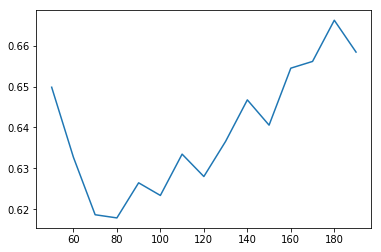

In [22]:
pop.compute_features_nb(classifier='svm',reducer='lda',vmax=200,vmin=50,step=10)

In [23]:
pop.reduce_features(n_components=400,val='gt',reducer='kpca')

In [24]:
pop.train_classifier(classifier='knn')

cv scores : [0.85150812 0.92757009 0.92271663]
the total score is of 0.9005982805807521


0.9005982805807521

In [ ]:
pop.reduce_features(n_components=300,val='gt',reducer='spca')

In [ ]:
pop.train_classifier(classifier='knn')

In [21]:
pop.reduce_features(n_components=400,val='gt',reducer='lda')

In [22]:
pop.train_classifier(classifier='knn')

cv scores : [0.85382831 0.91588785 0.92740047]
the total score is of 0.899038875038622


0.899038875038622

In [23]:
pop.reduce_features(n_components=400,val='pha',reducer='pca')

In [24]:
pop.train_classifier(classifier='knn')

cv scores : [0.75174014 0.78738318 0.75644028]
the total score is of 0.7651878659372251


0.7651878659372251

In [42]:
pop.reduce_features(n_components=400,val='gt',reducer='lda')

In [58]:
pop.train_classifier(classifier='svm',test='reg',percentage=0.4)

the total score is of 0.961139896373057


0.961139896373057

In [44]:
pop.predict_labels()

array(['nfe', 'amr', 'eas', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'fin', 'fin', 'nfe', 'fin', 'fin', 'fin', 'fin', 'fin', 'fin',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'fin', 'fin', 'fin', 'fin', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'amr', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'amr', 'amr', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'amr', 'nfe', 'amr', 'amr',
       'amr', 'nfe', 'amr', 'nfe', 'amr', 'nfe', 'afr', 'amr', 'amr',
       'amr', 'amr',

In [53]:
for i,val in enumerate(pop.tofind['sample_id']):
    print val+" = "+ pop.found[i]

MacArthurLab_1 = nfe
MacArthurLab_2 = amr
MacArthurLab_4 = eas
MacArthurLab_6 = nfe
MacArthurLab_11 = nfe
MacArthurLab_15 = nfe
MacArthurLab_18 = nfe
MacArthurLab_19 = nfe
MacArthurLab_21 = nfe
MacArthurLab_22 = nfe
MacArthurLab_24 = nfe
MacArthurLab_26 = nfe
MacArthurLab_27 = nfe
MacArthurLab_28 = nfe
MacArthurLab_32 = nfe
MacArthurLab_33 = nfe
MacArthurLab_36 = nfe
MacArthurLab_37 = nfe
MacArthurLab_38 = nfe
MacArthurLab_40 = nfe
MacArthurLab_42 = nfe
MacArthurLab_50 = nfe
MacArthurLab_54 = nfe
MacArthurLab_57 = nfe
MacArthurLab_65 = nfe
MacArthurLab_68 = nfe
MacArthurLab_70 = nfe
MacArthurLab_72 = nfe
MacArthurLab_75 = nfe
MacArthurLab_81 = nfe
MacArthurLab_86 = nfe
MacArthurLab_91 = nfe
MacArthurLab_93 = nfe
MacArthurLab_99 = nfe
MacArthurLab_100 = nfe
MacArthurLab_102 = nfe
MacArthurLab_107 = fin
MacArthurLab_112 = fin
MacArthurLab_113 = nfe
MacArthurLab_121 = fin
MacArthurLab_122 = fin
MacArthurLab_126 = fin
MacArthurLab_128 = fin
MacArthurLab_129 = fin
MacArthurLab_135 = fin
Mac

In [27]:
pop.reduce_features(n_components=100,val='gt',reducer='lda')

In [8]:
pop.train_classifier(classifier='svm')

cv scores : [0.93735499 0.96028037 0.94613583]
the total score is of 0.9479237312041936


0.9479237312041936

## Now know the probabilities

you can get an insight into what is your probability to be from this or that part of the world 

In [36]:
lab = pop.predict_labels()

not checking that you are using svm
----------------------
MacArthurLab_1has:
0.004388481250810949% chance to be non finish european
0.7356904778327004% chance to be south asian
0.0012242715757432264% chance to be east asian
0.003795524209602322% chance to be mixed american
0.2508248520761965% chance to be finish
0.004076393054946521% chance to be african
----------------------
MacArthurLab_2has:
0.002754401466398653% chance to be non finish european
#### 0.956169123858157% chance to be south asian
0.0010536907861038078% chance to be east asian
0.0059609778927376764% chance to be mixed american
0.026150347241254104% chance to be finish
0.00791145875534904% chance to be african
----------------------
MacArthurLab_4has:
0.011558756694604053% chance to be non finish european
0.017691937000312304% chance to be south asian
#### 0.9368605696333447% chance to be east asian
0.006194019091100308% chance to be mixed american
0.00552581305105191% chance to be finish
0.02216890452958678% chance to

#### 0.9756420644739743% chance to be non finish european
0.007066334889187228% chance to be south asian
0.003534941746281466% chance to be east asian
0.003978915883756448% chance to be mixed american
0.003645757476587225% chance to be finish
0.006131985530213319% chance to be african
----------------------
MacArthurLab_812has:
#### 0.993649701972918% chance to be non finish european
0.0018904435026634678% chance to be south asian
0.0006925030065092764% chance to be east asian
0.0007286034988252661% chance to be mixed american
0.0010890782566600262% chance to be finish
0.0019496697624239066% chance to be african
----------------------
MacArthurLab_820has:
#### 0.9970306167485218% chance to be non finish european
0.0005062926786489429% chance to be south asian
0.0005447669974615587% chance to be east asian
0.00047057262908902083% chance to be mixed american
0.0003325880461502817% chance to be finish
0.0011151629001287468% chance to be african
----------------------
MacArthurLab_831has:


----------------------
MacArthurLab_1943has:
0.009942293397445953% chance to be non finish european
0.018993897503691983% chance to be south asian
0.005316294653529901% chance to be east asian
0.010038852458901733% chance to be mixed american
0.009409212710331972% chance to be finish
#### 0.9462994492760982% chance to be african
----------------------
MacArthurLab_1945has:
0.001128110481356343% chance to be non finish european
0.0012818375048043614% chance to be south asian
0.0008396566540313439% chance to be east asian
0.0006131985004331622% chance to be mixed american
0.0005703121000540554% chance to be finish
#### 0.9955668847593208% chance to be african
----------------------
MacArthurLab_1946has:
0.0018712249950192052% chance to be non finish european
0.0007313196887673445% chance to be south asian
0.0008146474785511781% chance to be east asian
0.0008815920449885036% chance to be mixed american
0.0010024249479917997% chance to be finish
#### 0.9946987908446818% chance to be africa

In [98]:
lab[9]

['mixed american', 0.9554438374220628]

cv scores : [0.95359629 0.97897196 0.88758782]
the total score is of 0.9400520241112966
cv scores : [0.9675174  0.97196262 0.91569087]
the total score is of 0.9517236282416933
cv scores : [0.94895592 0.97196262 0.92037471]
the total score is of 0.9470977468519003
cv scores : [0.95359629 0.96728972 0.93208431]
the total score is of 0.9509901054875579
cv scores : [0.94663573 0.97196262 0.94379391]
the total score is of 0.9541307528959747
cv scores : [0.94663573 0.96728972 0.94379391]
the total score is of 0.9525731204972209
cv scores : [0.93735499 0.96962617 0.95081967]
the total score is of 0.9526002762515061
cv scores : [0.93967517 0.96028037 0.96252927]
the total score is of 0.9541616072834601
cv scores : [0.93039443 0.95794393 0.96487119]
the total score is of 0.9510698503891867
cv scores : [0.9350348  0.96028037 0.96721311]
the total score is of 0.9541760971233656


(array([0.94005202, 0.94709775, 0.95099011, 0.95106985, 0.95172363,
        0.95257312, 0.95260028, 0.95413075, 0.95416161, 0.9541761 ]),
 [20, 36, 44, 84, 28, 60, 68, 52, 76, 92])

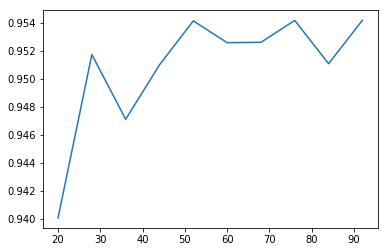

In [77]:
pop.compute_features_nb(classifier='svm',reducer='lda',vmax=100,vmin=20,step=8)

cv scores : [0.85382831 0.92056075 0.91803279]
the total score is of 0.8974739469377662
cv scores : [0.85614849 0.92056075 0.91803279]
the total score is of 0.898247342142716
cv scores : [0.85382831 0.9228972  0.92037471]
the total score is of 0.8990334032620454
cv scores : [0.85382831 0.9182243  0.92037471]
the total score is of 0.8974757708632916
cv scores : [0.85614849 0.9228972  0.91803279]
the total score is of 0.8990261583420929
cv scores : [0.85614849 0.9228972  0.92037471]
the total score is of 0.8998067984669952
cv scores : [0.85382831 0.9228972  0.91803279]
the total score is of 0.8982527631371431
cv scores : [0.85382831 0.9228972  0.91569087]
the total score is of 0.8974721230122406
cv scores : [0.85150812 0.92523364 0.91803279]
the total score is of 0.8982581841315703
cv scores : [0.85382831 0.9228972  0.91803279]
the total score is of 0.8982527631371431


(array([0.89747212, 0.89747395, 0.89747577, 0.89824734, 0.89825276,
        0.89825276, 0.89825818, 0.89902616, 0.8990334 , 0.8998068 ]),
 [76, 20, 44, 28, 68, 92, 84, 52, 36, 60])

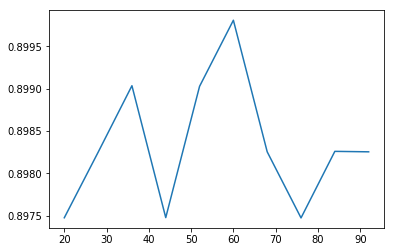

In [78]:
pop.compute_features_nb(classifier='knn',reducer='lda',vmax=100,vmin=20,step=8)

cv scores : [0.85382831 0.92757009 0.92037471]
the total score is of 0.9005910356607995
cv scores : [0.85614849 0.92757009 0.92271663]
the total score is of 0.9021450709906516
cv scores : [0.85382831 0.92757009 0.92037471]
the total score is of 0.9005910356607995
cv scores : [0.85614849 0.92523364 0.92271663]
the total score is of 0.9013662547912746
cv scores : [0.85382831 0.92757009 0.92037471]
the total score is of 0.9005910356607995
cv scores : [0.85382831 0.92523364 0.92505855]
the total score is of 0.9013734997112274
cv scores : [0.85382831 0.9228972  0.92271663]
the total score is of 0.8998140433869479
cv scores : [0.85614849 0.92757009 0.92271663]
the total score is of 0.9021450709906516
cv scores : [0.85382831 0.92523364 0.92271663]
the total score is of 0.9005928595863248
cv scores : [0.85382831 0.92523364 0.92271663]
the total score is of 0.9005928595863248
cv scores : [0.85382831 0.92990654 0.92037471]
the total score is of 0.9013698518601764
cv scores : [0.85382831 0.925233

(array([0.89981404, 0.90059104, 0.90059104, 0.90059104, 0.90059286,
        0.90059286, 0.90059286, 0.90059286, 0.90136625, 0.90136985,
        0.90137168, 0.9013735 , 0.9013735 , 0.90214507, 0.90214507,
        0.90215414]),
 [500,
  200,
  300,
  400,
  600,
  650,
  750,
  900,
  350,
  700,
  800,
  450,
  850,
  250,
  550,
  950])

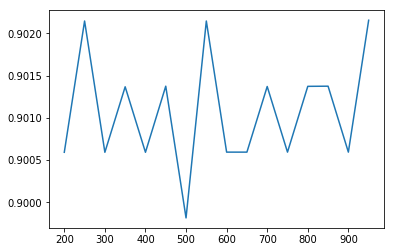

In [80]:
pop.compute_features_nb(classifier='knn',reducer='lda',vmax=1000,vmin=200,step=50)

## Looks like we got a winner...

cv scores : [0.95823666 0.96261682 0.95784543]
the total score is of 0.9595663048726301
cv scores : [0.94663573 0.97663551 0.96018735]
the total score is of 0.9611528661690456
cv scores : [0.9512761  0.98130841 0.96487119]
the total score is of 0.9658185692275039
cv scores : [0.97447796 0.99299065 0.9765808 ]
the total score is of 0.9813498028983979
cv scores : [0.96983759 0.98831776 0.96721311]
the total score is of 0.9751228195901348
cv scores : [0.96287703 0.98831776 0.96252927]
the total score is of 0.9712413537254809
cv scores : [0.9675174  0.9953271  0.96721311]
the total score is of 0.976685872983316
cv scores : [0.9675174  0.98831776 0.95784543]
the total score is of 0.9712268638855756


(array([0.9595663 , 0.96115287, 0.96581857, 0.97122686, 0.97124135,
        0.97512282, 0.97668587, 0.9813498 ]), [5, 7, 9, 19, 15, 13, 17, 11])

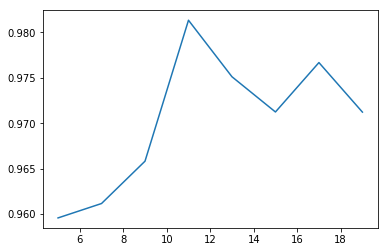

In [82]:
pop.compute_features_nb(classifier='gaussian',reducer='lda',vmax=20,vmin=5,step=2)

In [33]:
pop.reduce_features(n_components=90,val='gt',reducer='lda')

In [34]:
pop.train_classifier(classifier='svm')

cv scores : [0.92807425 0.95560748 0.95316159]
the total score is of 0.945614438360348


0.945614438360348

In [31]:
pop.reduce_features(n_components=7,val='gt',reducer='lda')

In [32]:
pop.train_classifier(classifier='gaussian')

cv scores : [0.93039443 0.94859813 0.92974239]
the total score is of 0.9362449837181427


0.9362449837181427